# A304_SRO_NGO_Hall_122K_p1T_to_n1T

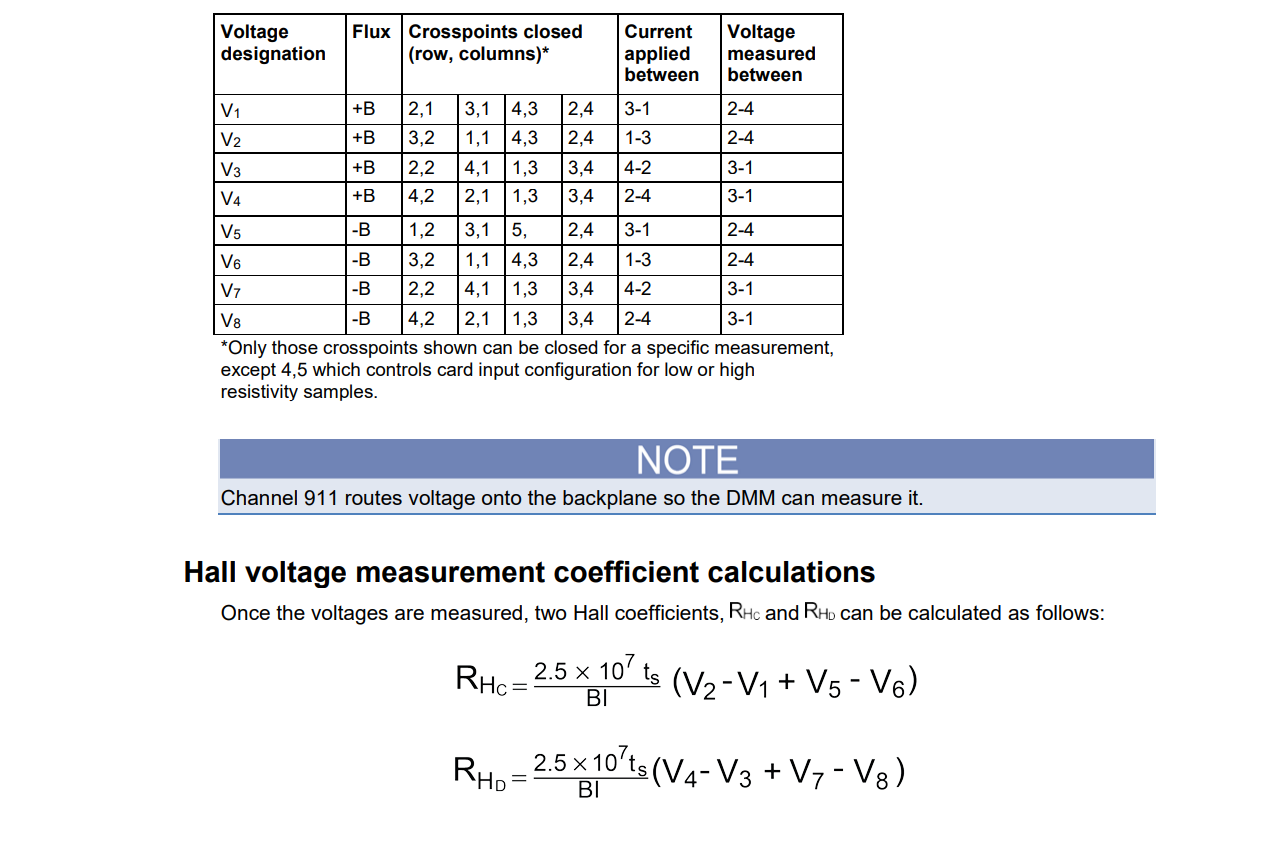

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
filename='C:\\Users\\Admin\\Desktop\\Data\\21june2023\\A304_122K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.443115,121.996051,-132.657370,132.652424,140.859034,-140.823727,6.259000e-07,1000000
1,0.001,9000.520557,122.000991,-131.384458,131.387701,140.285543,-140.260538,6.251000e-07,1000000
2,0.001,8000.573193,121.998860,-130.109105,130.102127,139.736567,-139.700291,6.594000e-07,1000000
3,0.001,7000.466772,122.000217,-128.835880,128.828424,139.156233,-139.116170,6.614000e-07,1000000
4,0.001,6000.456689,121.999874,-127.585088,127.565875,138.585764,-138.529298,6.702000e-07,1000000
...,...,...,...,...,...,...,...,...,...
61,0.001,6000.401147,122.000449,-127.482802,127.492762,138.557296,-138.514581,6.636000e-07,1000000
62,0.001,7000.404639,122.000349,-128.783900,128.767589,139.112472,-139.084918,6.786000e-07,1000000
63,0.001,8000.271191,121.999981,-130.047915,130.060302,139.692202,-139.631643,6.682000e-07,1000000
64,0.001,9000.399512,122.000573,-131.300147,131.307165,140.237859,-140.206729,6.740000e-07,1000000


In [3]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [4]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [5]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.443115,10000,121.996051,132.657370,-132.652424,-140.859034,140.823727,6.259000e-07,1000000
1,0.001,9000.520557,9000,122.000991,131.384458,-131.387701,-140.285543,140.260538,6.251000e-07,1000000
2,0.001,8000.573193,8000,121.998860,130.109105,-130.102127,-139.736567,139.700291,6.594000e-07,1000000
3,0.001,7000.466772,7000,122.000217,128.835880,-128.828424,-139.156233,139.116170,6.614000e-07,1000000
4,0.001,6000.456689,6000,121.999874,127.585088,-127.565875,-138.585764,138.529298,6.702000e-07,1000000


In [6]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

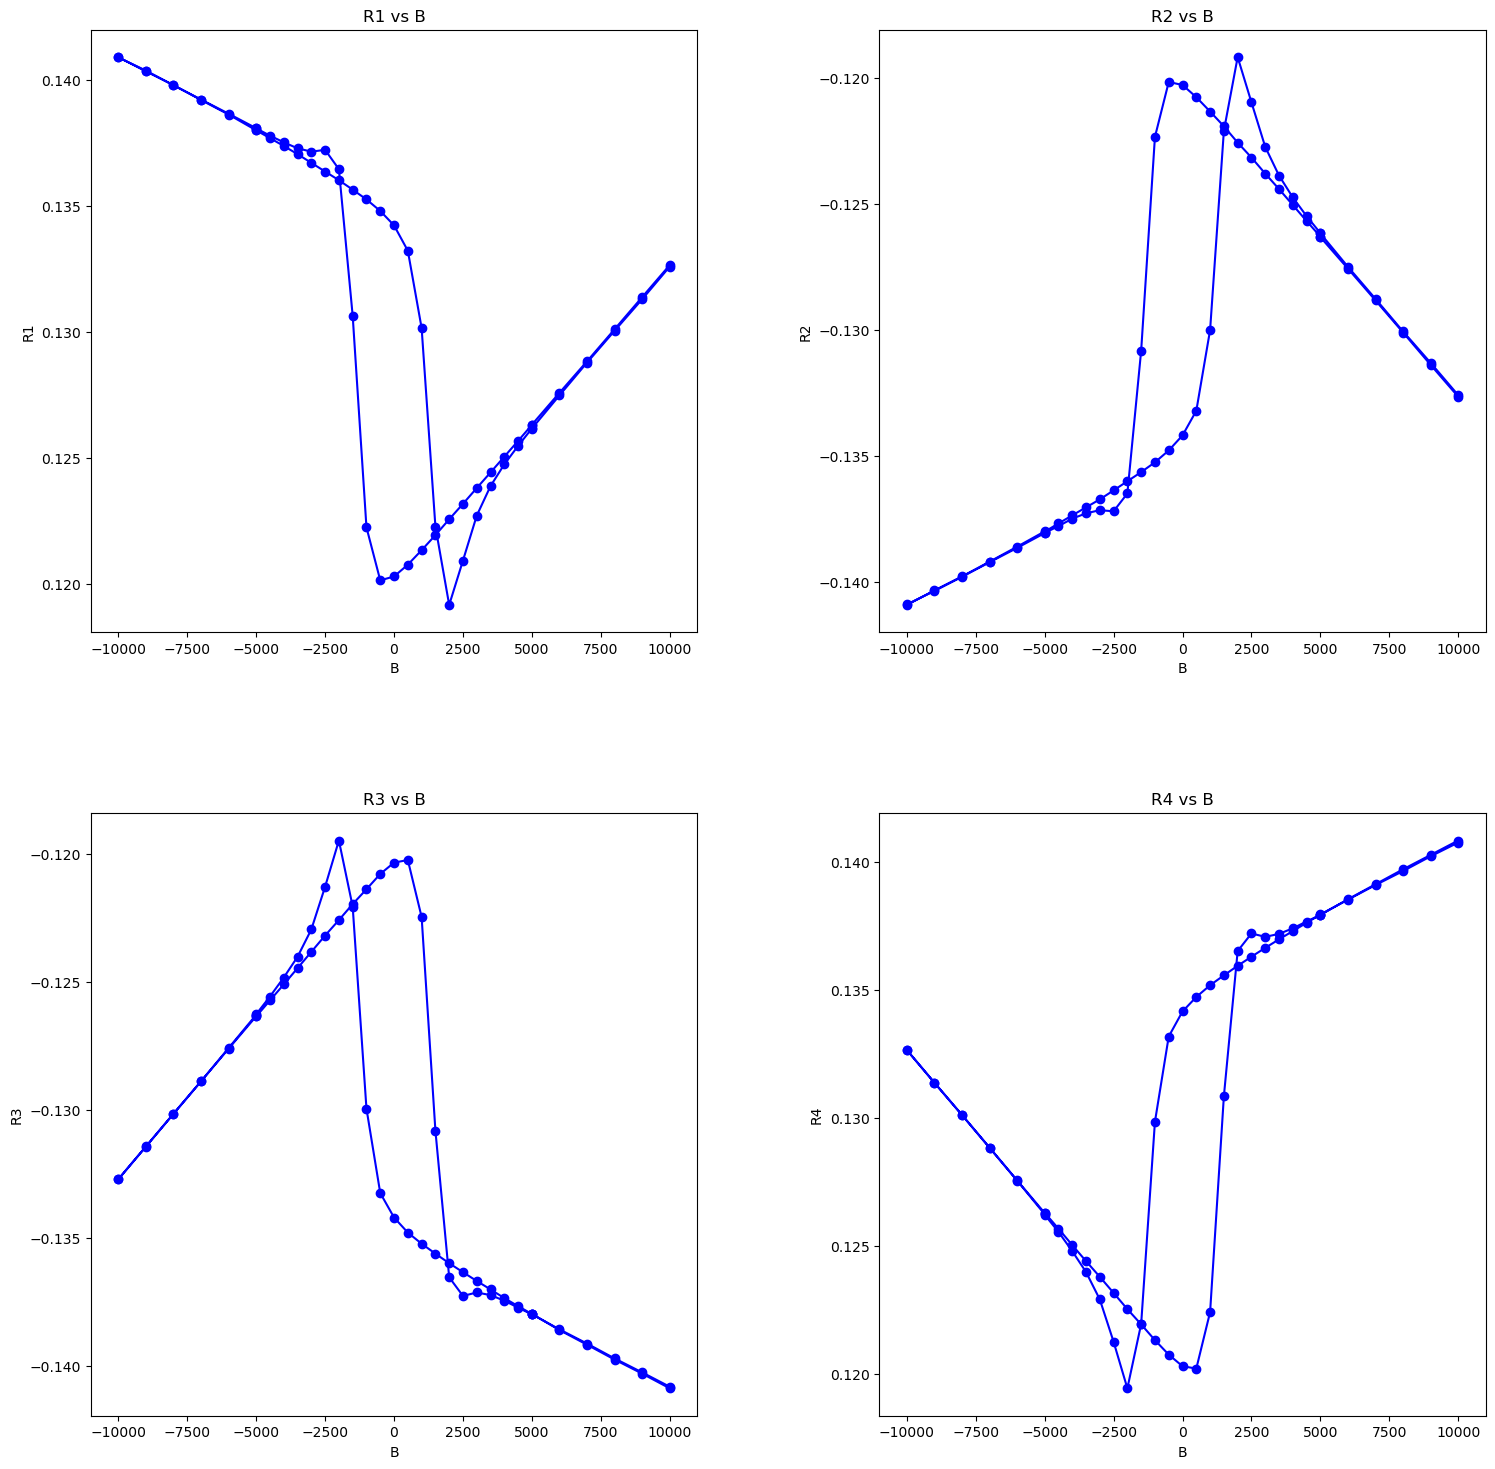

In [7]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [8]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [9]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [10]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [11]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.443115,10000,121.996051,132.657370,-132.652424,-140.859034,140.823727,6.259000e-07,1000000
1,0.001,9000.520557,9000,122.000991,131.384458,-131.387701,-140.285543,140.260538,6.251000e-07,1000000
2,0.001,8000.573193,8000,121.998860,130.109105,-130.102127,-139.736567,139.700291,6.594000e-07,1000000
3,0.001,7000.466772,7000,122.000217,128.835880,-128.828424,-139.156233,139.116170,6.614000e-07,1000000
4,0.001,6000.456689,6000,121.999874,127.585088,-127.565875,-138.585764,138.529298,6.702000e-07,1000000


In [12]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.276758,-10000,122.000492,140.913119,-140.921631,-132.695703,132.646330,6.383000e-07,1000000
34,0.001,-9000.366895,-9000,122.000586,140.345891,-140.345293,-131.426108,131.368130,6.438000e-07,1000000
35,0.001,-8000.413232,-8000,122.000128,139.802471,-139.790634,-130.139050,130.106974,6.541000e-07,1000000
36,0.001,-7000.351709,-7000,122.000548,139.210752,-139.204710,-128.871988,128.840750,6.511000e-07,1000000
37,0.001,-6000.323682,-6000,122.000342,138.633418,-138.609820,-127.601624,127.558264,6.544000e-07,1000000


In [13]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [14]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,121.996051,132.657370,-132.652424,-140.859034,140.823727,140.913119,-140.921631,-132.695703,132.646330,1000000
1,0.001,9000,122.000991,131.384458,-131.387701,-140.285543,140.260538,140.345891,-140.345293,-131.426108,131.368130,1000000
2,0.001,8000,121.998860,130.109105,-130.102127,-139.736567,139.700291,139.802471,-139.790634,-130.139050,130.106974,1000000
3,0.001,7000,122.000217,128.835880,-128.828424,-139.156233,139.116170,139.210752,-139.204710,-128.871988,128.840750,1000000
4,0.001,6000,121.999874,127.585088,-127.565875,-138.585764,138.529298,138.633418,-138.609820,-127.601624,127.558264,1000000


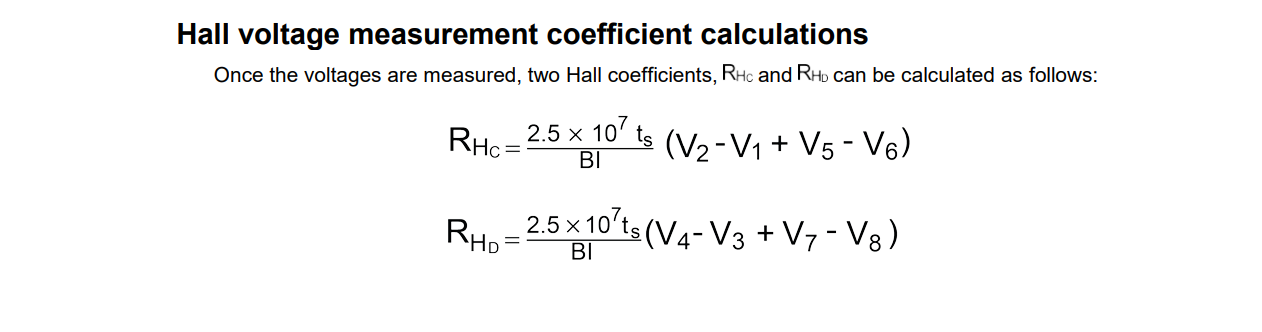
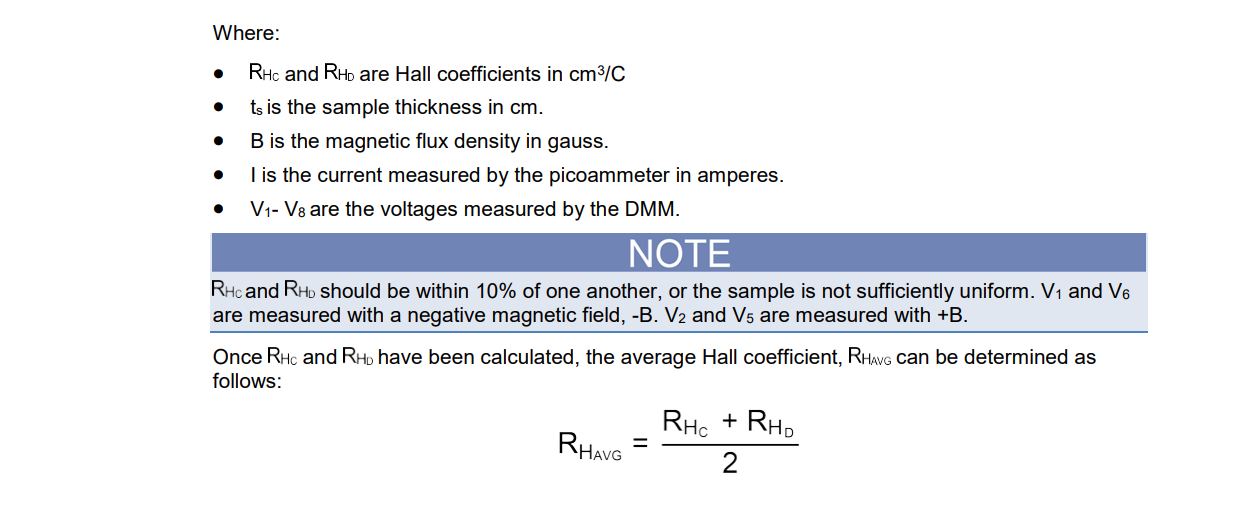

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [15]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

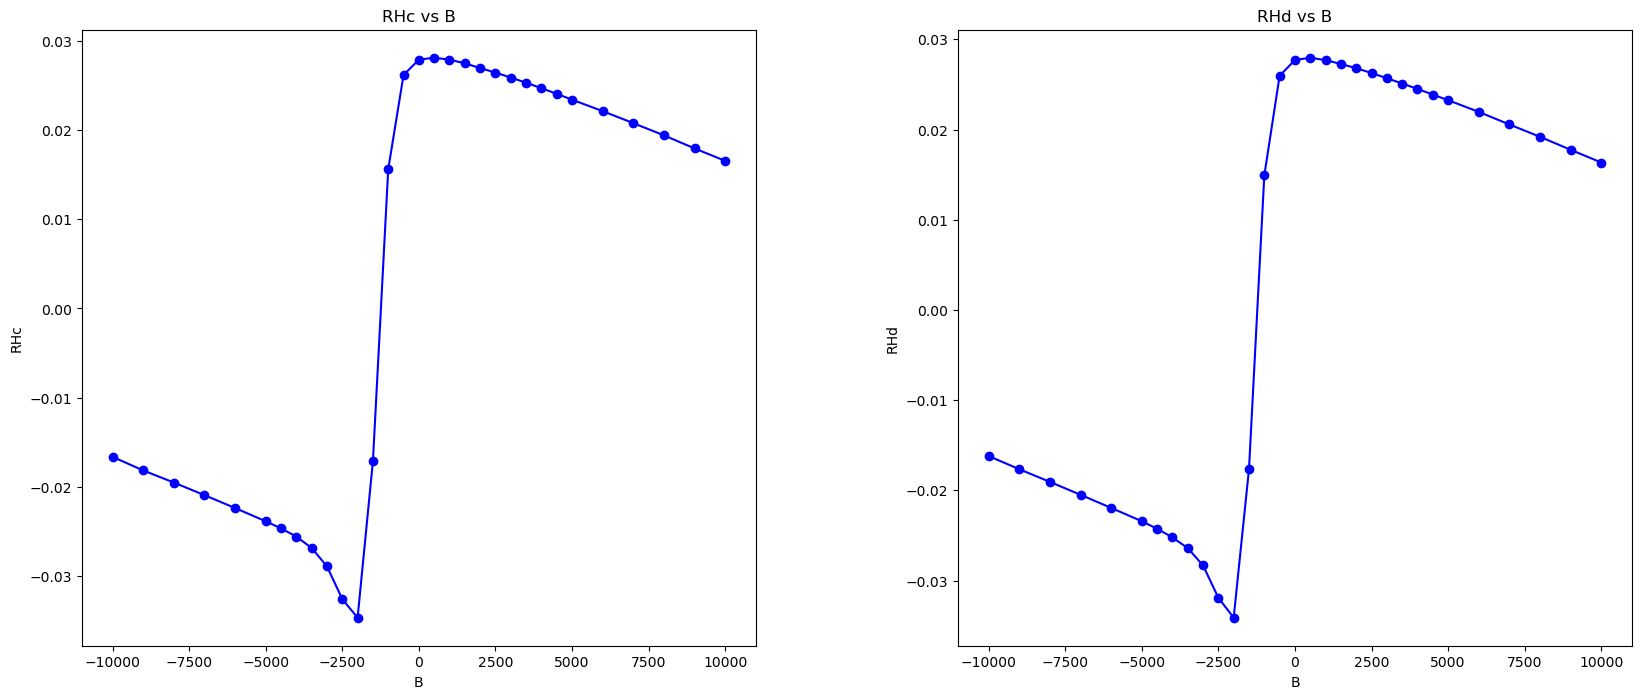

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

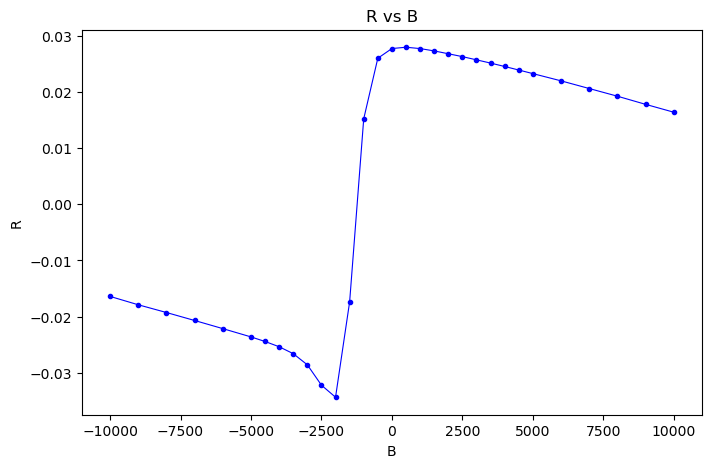

In [17]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [18]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,122.000492,140.913119,-140.921631,-132.695703,132.646330,132.657370,-132.652424,-140.859034,140.823727,1000000
1,0.001,-9000,122.000586,140.345891,-140.345293,-131.426108,131.368130,131.384458,-131.387701,-140.285543,140.260538,1000000
2,0.001,-8000,122.000128,139.802471,-139.790634,-130.139050,130.106974,130.109105,-130.102127,-139.736567,139.700291,1000000
3,0.001,-7000,122.000548,139.210752,-139.204710,-128.871988,128.840750,128.835880,-128.828424,-139.156233,139.116170,1000000
4,0.001,-6000,122.000342,138.633418,-138.609820,-127.601624,127.558264,127.585088,-127.565875,-138.585764,138.529298,1000000


### Hall resistance calculation

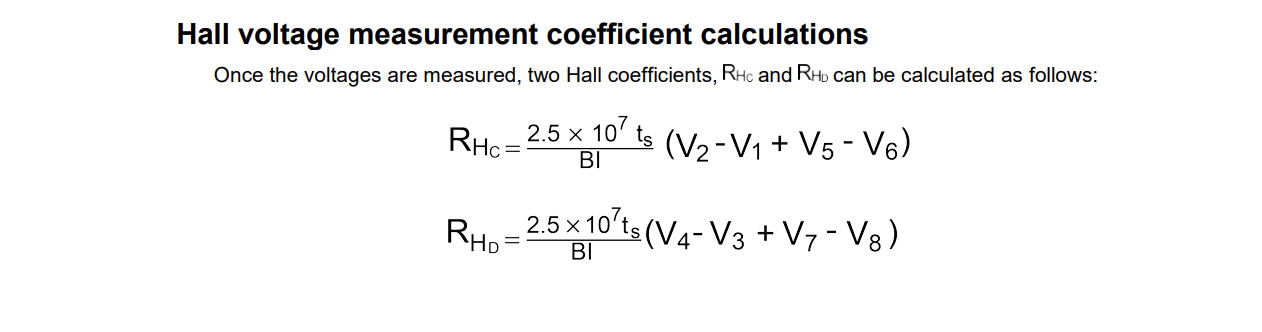

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [19]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

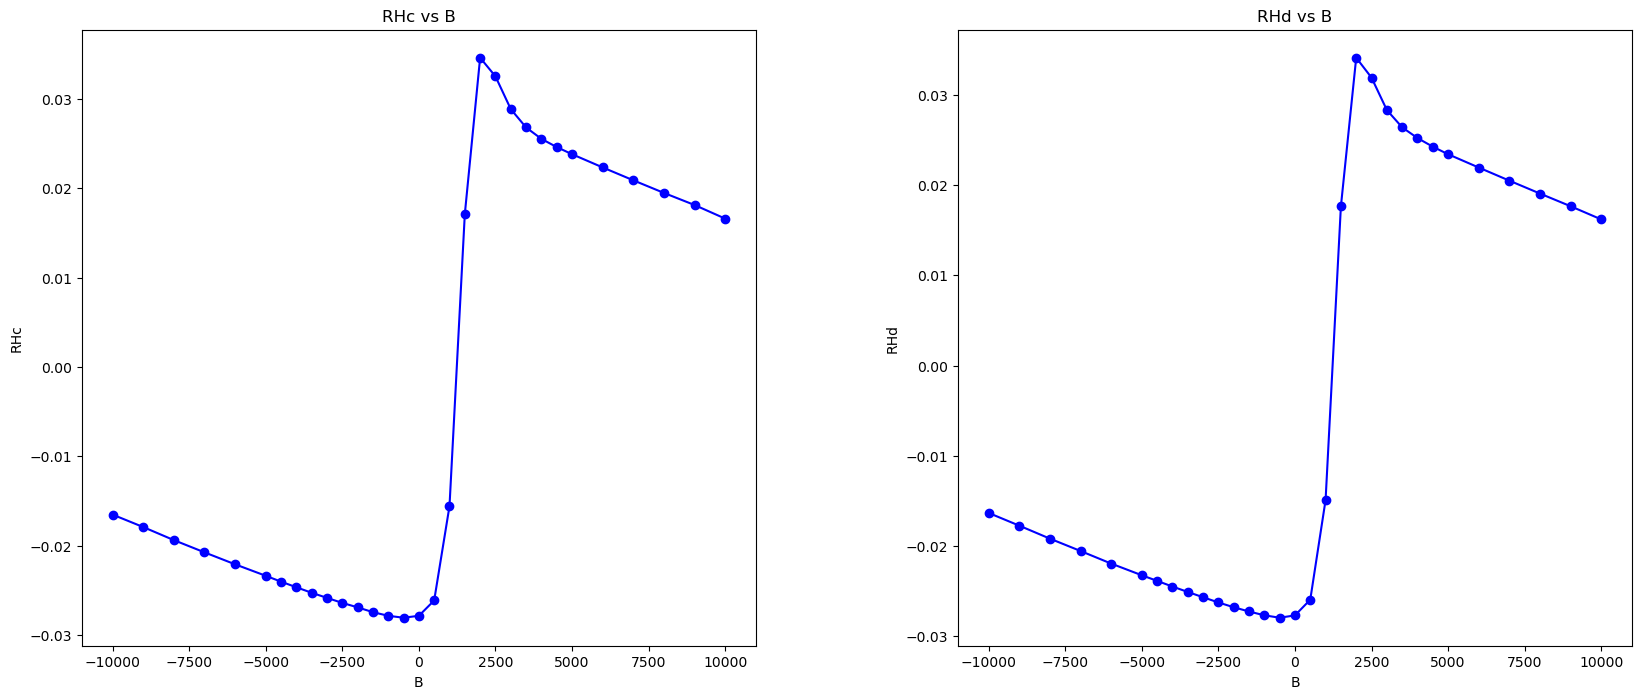

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

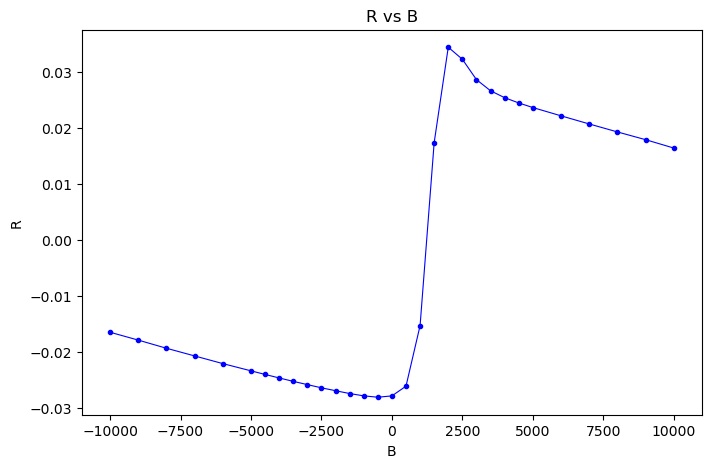

In [21]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

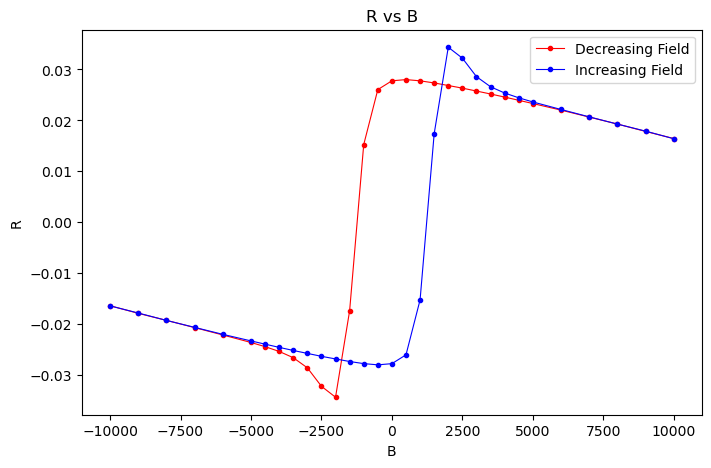

In [22]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [23]:
data.to_pickle("./pickle_data/122K_dec.pkl")
data2.to_pickle("./pickle_data/122K_inc.pkl")